Prerequisites
- Crude death rate calculations

    - Crude death rate ([according to UN](https://population.un.org/wpp/GlossaryOfDemographicTerms/)) is a number of deaths over a given period divided by the person-years lived by the population over that period. As we have data on age-specific death rates we need to find data on population  by five-year age group in 2019 in the US and Uganda. These can be downloaded (in future we can use API) [from here](https://population.un.org/dataportal/data/indicators/46/locations/800,840/start/2019/end/2019/table/pivotbyage?df=6d364667-828f-466c-9a81-a0d8a4e31524)
    - In data on age-specific death rates the last age group is 85+, but in population data we have groups up to 100+. To get the estimate of the population in group 85+ we will sum up population numbers for groups from 85-89 to 100+.
    - We will calculate total population as a sum of all age groups
    
    
- Standardized death rate calculations
    - According to [WHO](https://cdn.who.int/media/docs/default-source/gho-documents/global-health-estimates/gpe_discussion_paper_series_paper31_2001_age_standardization_rates.pdf) the directly standardized mortality rate for population A is given by the following equation: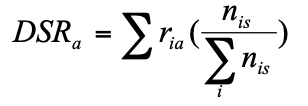 where n_is is the mid-year population in the i_th age group of the standard population, r_ia is the death rates in age group i in populations A
    - WHO World Standard Population Distribution can be found in the same document

Results
- Crude death rate per 100.000 people
    - US - 57.2
    - Uganda - 5.8
    
- Age-standardized death rate per 100.000 people
    - US - 28.4
    - Uganda - 28.7
    
Drastic difference in crude rates between populations is caused by the underlying age composition difference. By age-standardizing the death rates, one can obtain a more meaningful comparison that reflects the underlying differences in mortality patterns independent of age. So, after age standardization, the numbers become compatible for comparison, providing a clearer understanding of the true similarities in mortality rates between the  populations of Uganda and USA.

In [232]:
import pandas as pd
import numpy as np

In [15]:
# Loading table of he age-specific death rates from COPD in boththe United States and Uganda in 2019.
# The values are given as deaths per 100,000 people.


age_sp_death_rate = pd.read_csv('~/Downloads/dr.csv', decimal = ',')

In [151]:
age_sp_death_rate.head()

,group,us,ug
0,0-4,0.04,0.40
1,5-9,0.02,0.17
2,10-14,0.02,0.07
3,15-19,0.02,0.23
4,20-24,0.06,0.38


In [152]:
# Loading WHO World Standard Population Distribution (percent)

spd = pd.read_csv('~/Downloads/spd.csv', decimal = ',')

In [153]:
spd.head()

,group,spd
0,0-4,8.86
1,5-9,8.69
2,10-14,8.60
3,15-19,8.47
4,20-24,8.22


In [154]:
# Calculating the age-standardized death rate for COPD for all ages in both the United States and Uganda for 2019

print('Age-standardized death rate for COPD for all ages per 100.000 people')

print(f'''in US {np.sum(age_sp_death_rate['us']*spd['spd']/100).round(1)}''')

print(f'''in Uganda {np.sum(age_sp_death_rate['ug']*spd['spd']/100).round(1)}''')

Age-standardized death rate for COPD for all ages per 100.000 people
in US 28.4
in Uganda 28.7


In [218]:
pop = pd.read_csv('~/Downloads/unpopulation_dataportal_20240318041521.csv', usecols = ['Age', 'Value', 'Location'])

In [219]:
pop.tail()

,Location,Age,Value
37,United States of America,80-84,6118866.5
38,United States of America,85-89,3977177.5
39,United States of America,90-94,1656067.0
40,United States of America,95-99,501754.5
41,United States of America,100+,78955.0


In [220]:
pop['Location'] = np.where(pop.Location == 'United States of America', 'us_pop', 'ug_pop')

In [221]:
pop.head()

,Location,Age,Value
0,ug_pop,0-4,7328968.0
1,ug_pop,5-9,6614420.5
2,ug_pop,10-14,5899400.5
3,ug_pop,15-19,5151082.0
4,ug_pop,20-24,4348173.0


In [222]:
# To get the esimate of the population in group 85+
# we will sum up population numbers for groups from 85-89 to 100+

df2 = pd.DataFrame([
    {
        'Location':'ug_pop', 'Age': '85+', 'Value': pop.query("Location == 'ug_pop' & (Age > '85' | Age == '100+')").Value.sum()
    },
    {
        'Location':'us_pop', 'Age': '85+', 'Value':pop.query("Location == 'us_pop' & (Age > '85' | Age == '100+')").Value.sum()
    }
])
pop_edited = pop.query("Age < '85' & Age != '100+'")
pop_edited = pd.concat([pop_edited,df2])
p = pop_edited.pivot(index = 'Age', columns = 'Location', values = 'Value')
p.reset_index(inplace = True)
p.rename(columns = {'Age':'group'}, inplace = True)

In [223]:
p = p.merge(age_sp_death_rate, on = 'group')
p

,group,ug_pop,us_pop,us,ug
0,0-4,7328968.0,19848556.0,0.04,0.40
1,10-14,5899400.5,22092167.5,0.02,0.07
2,15-19,5151082.0,21895122.5,0.02,0.23
3,20-24,4348173.0,21871808.5,0.06,0.38
4,25-29,3499504.0,23406927.5,0.11,0.40
5,30-34,2618559.0,22842151.5,0.29,0.75
6,35-39,1903175.0,22296952.5,0.56,1.11
7,40-44,1503669.5,20694555.5,1.42,2.04
8,45-49,1234979.0,21244258.5,4.00,5.51
9,5-9,6614420.5,20697075.5,0.02,0.17


In [224]:
print('Crude death rate for COPD for all ages per 100.000 people')

print(f'''in US {(np.sum(p['us']*p['us_pop'])/p['us_pop'].sum()).round(1)}''')

print(f'''in Uganda {(np.sum(p['ug']*p['ug_pop'])/p['ug_pop'].sum()).round(1)}''')

Crude death rate for COPD for all ages per 100.000 people
in US 57.2
in Uganda 5.8


In [225]:
p['us_pop_perc'] = 100*p.us_pop/p.us_pop.sum()

In [226]:
p['ug_pop_perc'] = 100*p.ug_pop/p.ug_pop.sum()

In [227]:
p = p.merge(spd, on = 'group')
p.group = np.where(p.group == '5-9', '05-09', p.group)

In [231]:
p.sort_values('group')[['group','us_pop_perc', 'ug_pop_perc', 'spd']]

,group,us_pop_perc,ug_pop_perc,spd
0,0-4,5.936999,17.064319,8.86
9,05-09,6.190804,15.400610,8.69
1,10-14,6.608097,13.735802,8.60
2,15-19,6.549158,11.993463,8.47
3,20-24,6.542184,10.124019,8.22
4,25-29,7.001361,8.148030,7.93
5,30-34,6.832428,6.096892,7.61
6,35-39,6.669351,4.431236,7.15
7,40-44,6.190050,3.501052,6.59
8,45-49,6.354475,2.875449,6.04
